In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

In [14]:
# 한글 깨짐 방지 작업
font_info="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

In [15]:
# 파일이 utf8 형식으로저장되었기때문에 utf8 형식으로 인코딩해야 에러안뜸
data_2012_2014 = pd.read_csv('data/accident_2012_2014.csv', encoding = 'utf8')
data_2015 = pd.read_csv('data/accident_2015.csv', encoding = 'utf8')
data_2016 = pd.read_csv('data/accident_2016.csv', encoding = 'utf8')
data = pd.concat([data_2012_2014, data_2015, data_2016], ignore_index=True)
data.head(5)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052936,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 4118
Data columns (total 27 columns):
발생년             23190 non-null int64
발생년월일시          23190 non-null int64
발생분             23190 non-null int64
주야              23190 non-null object
요일              23190 non-null object
사망자수            23190 non-null int64
사상자수            23190 non-null int64
중상자수            23190 non-null int64
경상자수            23190 non-null int64
부상신고자수          23190 non-null int64
발생지시도           23190 non-null object
발생지시군구          23190 non-null object
사고유형_대분류        23190 non-null object
사고유형_중분류        23190 non-null object
사고유형            23190 non-null object
법규위반_대분류        23190 non-null object
법규위반            23190 non-null object
도로형태_대분류        23190 non-null object
도로형태            23190 non-null object
당사자종별_1당_대분류    23190 non-null object
당사자종별_1당        23190 non-null object
당사자종별_2당_대분류    22365 non-null object
당사자종별_2당        22365 non-null object
발생위치X_UTMK      23190 non-

# 1. 지역별 사망자수 분석

In [113]:
# 시별로 교통사고사망자 수를 확인하기 위해 그룹화 작업을 실행하는 d1 객체 생성
d1 = data.groupby(['발생지시도'])

In [114]:
# 사망자 수 합계를 확인 경기 지역 사망자수가 제일 많다는것을 알수있음
d1['사망자수'].sum()

발생지시도
강원    1200
경기    4555
경남    2148
경북    2585
광주     508
대구     883
대전     511
부산     947
서울    1926
세종      99
울산     522
인천     787
전남    2081
전북    1640
제주     464
충남    2015
충북    1288
Name: 사망자수, dtype: int64

In [115]:
# 사망자수가 많은 경기지역을 대상으로 다시 분석하기 위해 필터링하여 d1 객체를 생성
d1=data[data.발생지시도=='경기']
d1.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052936,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262


In [116]:
# 경기지역의 시,군별 그룹화 작업을 실행하는 da1 객체 생성
da1 = d1.groupby(['발생지시군구'])

In [117]:
#사망자 수 합계를 요약하여 da2 객체 생성
da2=da1['사망자수'].sum()
da2

발생지시군구
가평군      87
고양시     290
과천시      17
광명시      65
광주시     155
구리시      40
군포시      49
김포시     144
남양주시    222
동두천시     52
부천시     159
성남시     225
수원시     260
시흥시     198
안산시     228
안성시     167
안양시     143
양주시     119
양평군     106
여주시     106
연천군      49
오산시      53
용인시     283
의왕시      37
의정부시    104
이천시     159
파주시     178
평택시     309
포천시     167
하남시      60
화성시     324
Name: 사망자수, dtype: int64

In [122]:
# 결과를 오름차순으로 정렬함
result=da2.sort_values(ascending=True).tail(5)
result

발생지시군구
수원시    260
용인시    283
고양시    290
평택시    309
화성시    324
Name: 사망자수, dtype: int64

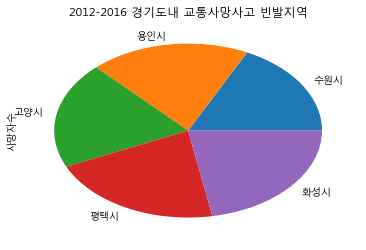

In [123]:
# 결과를 파이차트로 시각화함.
result.plot(kind='pie',title='2012-2016 경기도내 교통사망사고 빈발지역')

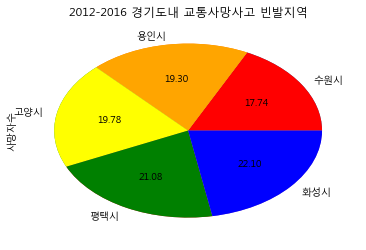

In [124]:
# matplotlib.pyplot 이용하여 파이차트를 작성함
c=['red', 'orange', 'yellow', 'green', 'blue'] # 색상을 빨 ~파 순으로 지정함
result.plot(kind='pie',title='2012-2016 경기도내 교통사망사고 빈발지역')
result=plt.pie(result,colors=c,autopct='%.2f') # 차지비율을 소숫점 2자리까지 출력
result=plt.title('2012-2016 경기도내 교통사망사고 빈발지역')

# 2. 요일별/발생지시도별 교통사고 분석

In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
# 한글 깨짐 방지 작업
font_info="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

In [128]:
# 교차분석 실행하여 요일별 발생지시도별 데이터 건수를 계산하기 위하여 d_pv 객체 실행
d_pv=pd.crosstab(data.요일,data.발생지시도)
d_pv=d_pv.reindex(['월','화','수','목','금','토','일', '' ]) # 인덱스위치를 월~일로 수정후 발생지시도가 겹쳐지기 때문에 공백인덱스를 추가함
d_pv

발생지시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
요일,,,,,,,,,,,,,,,,,
월,169.0,634.0,312.0,364.0,58.0,109.0,78.0,125.0,263.0,11.0,83.0,111.0,302.0,240.0,60.0,303.0,175.0
화,159.0,632.0,299.0,371.0,66.0,114.0,66.0,136.0,261.0,18.0,68.0,121.0,303.0,268.0,57.0,262.0,183.0
수,170.0,612.0,299.0,329.0,78.0,106.0,65.0,117.0,271.0,14.0,69.0,99.0,307.0,208.0,68.0,270.0,176.0
목,168.0,641.0,268.0,351.0,64.0,119.0,75.0,129.0,281.0,14.0,68.0,125.0,280.0,200.0,64.0,273.0,170.0
금,155.0,630.0,314.0,392.0,85.0,124.0,74.0,142.0,294.0,12.0,61.0,103.0,281.0,243.0,65.0,281.0,182.0
토,151.0,653.0,302.0,342.0,78.0,143.0,87.0,146.0,291.0,15.0,74.0,114.0,304.0,213.0,64.0,292.0,187.0
일,165.0,576.0,255.0,324.0,61.0,138.0,52.0,124.0,225.0,13.0,66.0,82.0,219.0,203.0,63.0,245.0,156.0
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


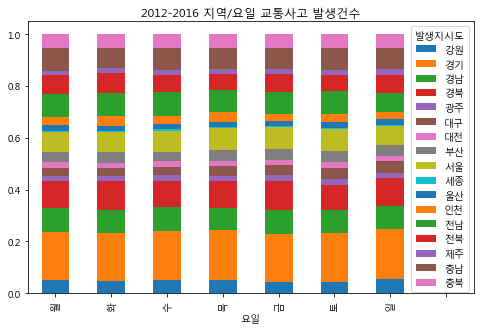

In [129]:
# 각행의 합이 1이 되도록 비율로 설정한 후 그 내용을 누적 막대형 차트로 시각화함
result=d_pv.div(d_pv.sum(1).astype(float),axis=0)
result.plot.bar(stacked=True,figsize=(8, 5), title='2012-2016 지역/요일 교통사고 발생건수')
plt.show()

# 3. folium 라이브러리를 이용한 지도표시

In [130]:
# 설치방법 
# Anaconda Prompt 창에 conda install -c conda-forge folium
# 혹은 Prompt에 install folium 
import folium
import pandas as pd

In [131]:
font_info="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

In [133]:
data_2012_2014 = pd.read_csv('data/accident_2012_2014.csv', encoding = 'utf8')
data_2015 = pd.read_csv('data/accident_2015.csv', encoding = 'utf8')
data_2016 = pd.read_csv('data/accident_2016.csv', encoding = 'utf8')
data = pd.concat([data_2012_2014, data_2015, data_2016], ignore_index=True)
# 2012 ~2016 까지의 교통사고사망정보 csv 파일 합치기

In [134]:
# 시흥시를 분석하기위해 경기지역을 대상으로 필터링하여 data2 객체를 생성
data2=data[data.발생지시도=='경기']

In [135]:
# 시흥시를 대상으로 필터링하여 data2 객체를 다시 생성
data2=data2[data2.발생지시군구=="시흥시"]
data2.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
81,2012,2012111109,50,주간,일,2,8,0,6,0,...,단일로,기타단일로,승합차,중형,승용차,중형,944056,1930192,126.868183,37.369106
105,2012,2012011101,10,야간,수,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,933198,1927719,126.745787,37.346098
221,2012,2012062000,5,야간,수,1,3,1,1,0,...,고가도로위,고가도로위,화물차,소형,승용차,중형,937257,1940031,126.790566,37.457351
251,2012,2012010518,25,야간,목,1,1,0,0,0,...,교차로,교차로부근,승용차,중형,보행자,보행자,935190,1931742,126.767924,37.382499
279,2012,2012010716,10,주간,토,1,1,0,0,0,...,단일로,횡단보도상,승용차,대형,보행자,보행자,931677,1929819,126.728423,37.364915


In [136]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 81 to 23121
Data columns (total 27 columns):
발생년             185 non-null int64
발생년월일시          185 non-null int64
발생분             185 non-null int64
주야              185 non-null object
요일              185 non-null object
사망자수            185 non-null int64
사상자수            185 non-null int64
중상자수            185 non-null int64
경상자수            185 non-null int64
부상신고자수          185 non-null int64
발생지시도           185 non-null object
발생지시군구          185 non-null object
사고유형_대분류        185 non-null object
사고유형_중분류        185 non-null object
사고유형            185 non-null object
법규위반_대분류        185 non-null object
법규위반            185 non-null object
도로형태_대분류        185 non-null object
도로형태            185 non-null object
당사자종별_1당_대분류    185 non-null object
당사자종별_1당        185 non-null object
당사자종별_2당_대분류    180 non-null object
당사자종별_2당        180 non-null object
발생위치X_UTMK      185 non-null int64
발생위치Y_UTMK      185 non-null int64
경도

In [137]:
# 데이터가 너무 많기때문에 사상자수가 3명이상인 경우에만 분석하기위하여 필터링함
data2=data2[(data2.사상자수>=3)]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 81 to 23121
Data columns (total 27 columns):
발생년             27 non-null int64
발생년월일시          27 non-null int64
발생분             27 non-null int64
주야              27 non-null object
요일              27 non-null object
사망자수            27 non-null int64
사상자수            27 non-null int64
중상자수            27 non-null int64
경상자수            27 non-null int64
부상신고자수          27 non-null int64
발생지시도           27 non-null object
발생지시군구          27 non-null object
사고유형_대분류        27 non-null object
사고유형_중분류        27 non-null object
사고유형            27 non-null object
법규위반_대분류        27 non-null object
법규위반            27 non-null object
도로형태_대분류        27 non-null object
도로형태            27 non-null object
당사자종별_1당_대분류    27 non-null object
당사자종별_1당        27 non-null object
당사자종별_2당_대분류    26 non-null object
당사자종별_2당        26 non-null object
발생위치X_UTMK      27 non-null int64
발생위치Y_UTMK      27 non-null int64
경도              27 non-null 

In [138]:
# folium 라이브러리를 사용
# zoom_start 는 줌인으로 초기화면 크기를 지정,
# 1일경우 전세계가 다보이고 높아질수록 더 자세하게 보임
# 좌표 37.38139, 126.80278 은 시흥시 표준좌표
# https://kor.timegenie.com/latitude_longitude/country/kr (대한민국 위도 경도 사이트)

m=folium.Map(location=[37.38139,126.80278],zoom_start=13)

In [139]:
# 마커를 생성 위도 경도를 받아 마커의 위치를 표시하고 사고유형을 마커를 클릭할시
# 보여줄 문자열로 전달하고 생성한 folium 객체에 add_to 함수를 사용하여 간단하게 마커를
# 생성할수있음
for lat,lon,name in zip(data2['위도'], data2['경도'], data2['사고유형']):
    folium.Marker(location=[lat,lon],popup=name).add_to(m)

In [334]:
# 생성된 지도를 상위 디렉토리 html안에 test.html 파일로 저장함
# 같은경로에 test.html 파일을 만들어도 되는데 따로 html 디렉토리를 생성해서 저장함.
# 상위디렉토리 html 이 없으면 오류가 남.
# m.save("test.html") # 디렉토리가 없을경우 이렇게 저장
m.save("html/test.html")

In [335]:
# 쥬피터노트북을 크롬으로 사용할경우 보이지만 인터넷 익스플로우로 사용할 경우 보이지않음
m

In [ ]:
# 같은경로내에 html 디렉토리가 없을경우 실행
# %%HTML
# <iframe width="100%" height="350" src="test.html"></iframe>

In [336]:
%%HTML
<iframe width="100%" height="350" src="html/test.html"></iframe>

In [337]:
# 인터넷익스플로우일경우 보이지않기때문에 html 문서를 열어서 볼수있음

# 4. seaborn 라이브러리를 응용해서 서울시 교통사고 발생지역 시각화

In [161]:
# 설치방법 conda install -c conda-forge folium
# 서울시 교통사고현황 통계자료에 대한 확인
# heatmap 을 사용하기 위하여 seaborn 을 import함
import folium
import seaborn as sns

font_info="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23190 entries, 0 to 23189
Data columns (total 27 columns):
발생년             23190 non-null int64
발생년월일시          23190 non-null int64
발생분             23190 non-null int64
주야              23190 non-null object
요일              23190 non-null object
사망자수            23190 non-null int64
사상자수            23190 non-null int64
중상자수            23190 non-null int64
경상자수            23190 non-null int64
부상신고자수          23190 non-null int64
발생지시도           23190 non-null object
발생지시군구          23190 non-null object
사고유형_대분류        23190 non-null object
사고유형_중분류        23190 non-null object
사고유형            23190 non-null object
법규위반_대분류        23190 non-null object
법규위반            23190 non-null object
도로형태_대분류        23190 non-null object
도로형태            23190 non-null object
당사자종별_1당_대분류    23190 non-null object
당사자종별_1당        23190 non-null object
당사자종별_2당_대분류    22365 non-null object
당사자종별_2당        22365 non-null object
발생위치X_UTMK      23190 non

In [163]:
# 서울시를 대상으로 분석하기위해 필터링함
data=data[data.발생지시도=='서울']

In [164]:
# pivot_table을 사용하여 구별로 데이터를 쉽게 모아볼수있고 각 칼럼의 합을 구함
guDF = pd.pivot_table(data, index='발생지시군구', aggfunc=np.sum)
guDF.head()
# 모든컬럼의값이 더해졌기때문에 필요없는 칼럼을 제거해야함

,경도,경상자수,발생년,발생년월일시,발생분,발생위치X_UTMK,발생위치Y_UTMK,부상신고자수,사망자수,사상자수,위도,중상자수
발생지시군구,,,,,,,,,,,,
강남구,13086.691934,19,207407,207413881698,3043,98950781,200293079,5,105,158,3862.474434,29
강동구,10680.279490,10,169185,169190555393,2332,81372959,163789987,2,84,109,3153.769504,13
강북구,7875.793844,36,124886,124890386511,1605,59422770,121448478,2,62,113,2332.943001,13
강서구,13317.754872,30,211431,211438008339,2962,98840152,204864393,14,108,196,3943.500169,44
관악구,11551.200984,12,183263,183269144240,2516,86465075,176760979,1,93,119,3410.639250,13


In [165]:
# 사상자수와 각각의 수를 이용하여 퍼센트를 구하고 필요없는 데이터를 지우는 작업을 수행

guDF['경상자율'] = guDF['경상자수']/guDF['사상자수']*100
guDF['부상신고자율'] = guDF['부상신고자수']/guDF['사상자수']*100
guDF['사망자율'] = guDF['사망자수']/guDF['사상자수']*100


del guDF['경도']
del guDF['위도']
del guDF['발생년']
del guDF['발생년월일시']
del guDF['발생분']
del guDF['발생위치X_UTMK']
del guDF['발생위치Y_UTMK']

In [166]:
guDF.head()

,경상자수,부상신고자수,사망자수,사상자수,중상자수,경상자율,부상신고자율,사망자율
발생지시군구,,,,,,,,
강남구,19,5,105,158,29,12.025316,3.164557,66.455696
강동구,10,2,84,109,13,9.174312,1.834862,77.064220
강북구,36,2,62,113,13,31.858407,1.769912,54.867257
강서구,30,14,108,196,44,15.306122,7.142857,55.102041
관악구,12,1,93,119,13,10.084034,0.840336,78.151261


In [167]:
# 칼럼의 글자수가 길어서 표가 넒어지기때문에 칼럼의 이름을 간략화함
guDF.rename(columns = {'경상자수':'경상', 
                       '부상신고자수':'부상', 
                       '사망자수':'사망', 
                       '사상자수':'사상', 
                       '중상자수':'중상'}, inplace=True)

In [168]:
# 표의 크기가 줄어들은걸 볼수있음
guDF.head()

,경상,부상,사망,사상,중상,경상자율,부상신고자율,사망자율
발생지시군구,,,,,,,,
강남구,19,5,105,158,29,12.025316,3.164557,66.455696
강동구,10,2,84,109,13,9.174312,1.834862,77.064220
강북구,36,2,62,113,13,31.858407,1.769912,54.867257
강서구,30,14,108,196,44,15.306122,7.142857,55.102041
관악구,12,1,93,119,13,10.084034,0.840336,78.151261


### (2016년도 전국 인구수 데이터를 가져와서 가공)

In [169]:
korDF = pd.read_csv('data/pop_kor.csv', encoding = 'ANSI')
# http://kosis.kr/index/index.do
# 다운로드하는법 
# (1) kOSIS국가통계포털사이트 접속 
# (2) 통계시각화콘텐츠에 인구로 보는 대한민국 클릭
# (3) 숫자로 보는 인구에 인구와 가구 클릭
# (4) 시군구별 순위 클릭후 통계표 더보기 클릭후 CSV 파일로 다운로드

In [170]:
# 구조는 아래와 같음
korDF.head()

,행정구역별(시군구)(1),행정구역별(시군구)(2),2016
0,서울특별시,소계,9805506
1,서울특별시,종로구,154398
2,서울특별시,중구,128160
3,서울특별시,용산구,224993
4,서울특별시,성동구,294744


In [171]:
# 각 칼럼의 이름을 보기쉽게 변경함
korDF.rename(columns = {'행정구역별(시군구)(1)':'시도', 
                       '행정구역별(시군구)(2)':'구별',
                      '2016':'인구수'}, inplace=True)

In [172]:
korDF.head()

,시도,구별,인구수
0,서울특별시,소계,9805506
1,서울특별시,종로구,154398
2,서울특별시,중구,128160
3,서울특별시,용산구,224993
4,서울특별시,성동구,294744


In [173]:
# 서울특별시를 기준으로 필터링함
korDF=korDF[korDF.시도=='서울특별시']
korDF.head()

,시도,구별,인구수
0,서울특별시,소계,9805506
1,서울특별시,종로구,154398
2,서울특별시,중구,128160
3,서울특별시,용산구,224993
4,서울특별시,성동구,294744


In [174]:
# 0번행에 소계와 모든 인구수가합쳐진값은 필요없기때문에 제거함
korDF=korDF.drop(0)

In [175]:
korDF.head()
# 0번행이 제거됨

,시도,구별,인구수
1,서울특별시,종로구,154398
2,서울특별시,중구,128160
3,서울특별시,용산구,224993
4,서울특별시,성동구,294744
5,서울특별시,광진구,363979


In [176]:
del korDF['시도']
# 서울특별시로 필터링했기때문에 시도도 필요없어서 제거함

In [177]:
korDF.to_csv("data/pop_seoul.csv", index=False)
# 가공된 데이터를 상위디렉토리인 data디렉토리에 pop_seoul.csv 로 저장힘

### (가공된 데이터를 가져와 기존 데이터프레임과 합침)

In [178]:
# 가공하여 저장한 서울 구별 인구수 데이터를 가져와 사용함.
# 구조는 아래와 같음.
popDF = pd.read_csv('data/pop_seoul.csv', encoding='UTF-8', index_col='구별')
popDF.head()

,인구수
구별,
종로구,154398
중구,128160
용산구,224993
성동구,294744
광진구,363979


In [179]:
# 교통사고통계데이터와 서울시 구별인구수 데이터의 index 값이 같기때문에 join 명령으로
# 데이터를 합침
guDF = guDF.join(popDF)

In [180]:
# 합쳐진걸 확인 가능함
guDF.head()

,경상,부상,사망,사상,중상,경상자율,부상신고자율,사망자율,인구수
발생지시군구,,,,,,,,,
강남구,19,5,105,158,29,12.025316,3.164557,66.455696,532469
강동구,10,2,84,109,13,9.174312,1.834862,77.064220,429416
강북구,36,2,62,113,13,31.858407,1.769912,54.867257,316212
강서구,30,14,108,196,44,15.306122,7.142857,55.102041,574287
관악구,12,1,93,119,13,10.084034,0.840336,78.151261,515648


In [181]:
# 합쳐진 데이터가지고 사망자율로 내림차순정렬하여 순위를 매겨봄
guDF.sort_values(by='사망자율', ascending=False, inplace=True)
guDF.head()

,경상,부상,사망,사상,중상,경상자율,부상신고자율,사망자율,인구수
발생지시군구,,,,,,,,,
종로구,4,0,53,60,3,6.666667,0.000000,88.333333,154398
도봉구,4,1,57,66,4,6.060606,1.515152,86.363636,336745
성북구,6,0,69,82,7,7.317073,0.000000,84.146341,451800
성동구,4,1,48,59,6,6.779661,1.694915,81.355932,294744
동대문구,14,2,93,118,9,11.864407,1.694915,78.813559,359935


In [182]:
# 이제 그래프로 각 구별 현황을 확인하기위하여 작업을 수행함

target_col = ['경상', '부상', '사망', '사상', '중상']
weight_col = guDF[target_col].max()

accident_count_norm = guDF[target_col]/weight_col
accident_count_norm.head()

,경상,부상,사망,사상,중상
발생지시군구,,,,,
종로구,0.074074,0.000000,0.386861,0.304569,0.068182
도봉구,0.074074,0.071429,0.416058,0.335025,0.090909
성북구,0.111111,0.000000,0.503650,0.416244,0.159091
성동구,0.074074,0.071429,0.350365,0.299492,0.136364
동대문구,0.259259,0.142857,0.678832,0.598985,0.204545


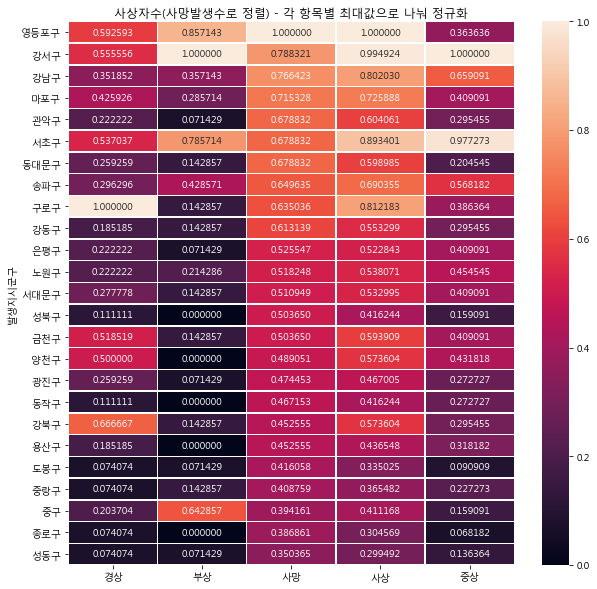

In [183]:
# seaborn의 heatmap 을 사용함
# 사상자수를 사망수로 나누어서 교통사고 발생비율을 시각화
plt.figure(figsize = (10,10))
sns.heatmap(accident_count_norm.sort_values(by='사망', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('사상자수(사망발생수로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

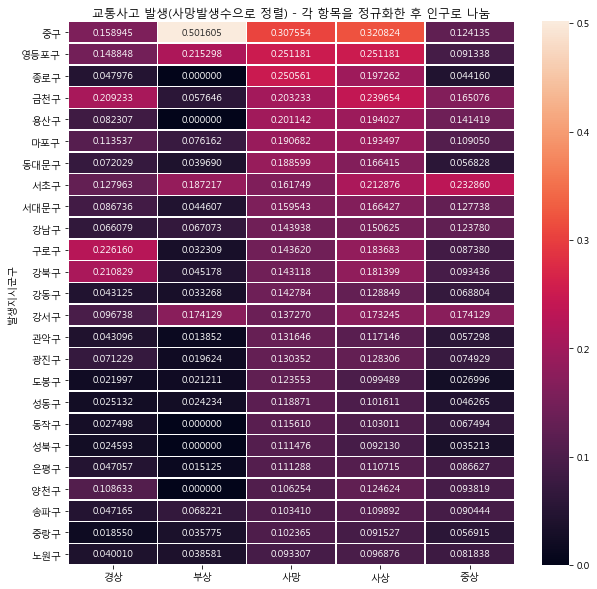

In [184]:
# 단순히 교통사고 발생으로 분석하기에는 한계가있어서 인구수로 나눠서 인구대비
# 교통사고사망 발생비율로 시각화함

accident_ratio = accident_count_norm.div(guDF['인구수'], axis=0)*100000

plt.figure(figsize = (10,10))
sns.heatmap(accident_ratio.sort_values(by='사망', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('교통사고 발생(사망발생수으로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()

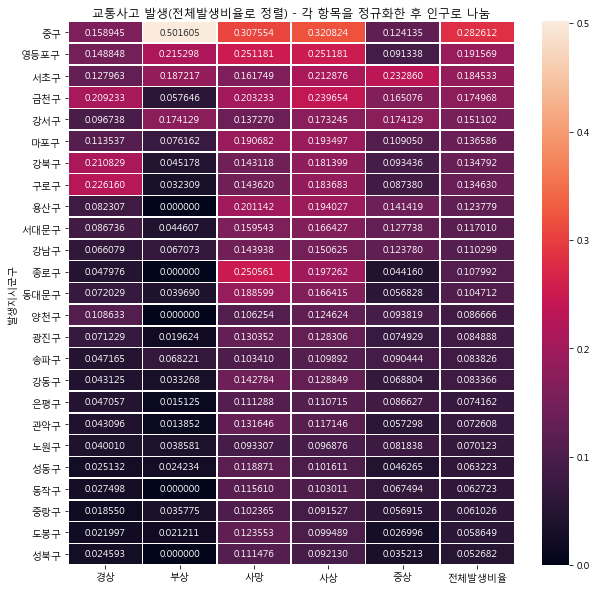

In [185]:
# 마지막으로 전체발생비율로 정렬하여 시각화함
accident_ratio['전체발생비율'] = accident_ratio.mean(axis=1)

plt.figure(figsize = (10,10))
sns.heatmap(accident_ratio.sort_values(by='전체발생비율', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('교통사고 발생(전체발생비율로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()

# 5. Folium 라이브러리를 응용해서 데이터 합치기

In [186]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# folium 지도에다가 서울 교통사고 발생수를 시각화하기위해서 서울 지도 데이터를 읽어옴
# 즉, 지도에 데이터를 표현하려고함
# https://github.com/southkorea/southkorea-maps/tree/master/gadm/json (한국 지도 데이터)

In [191]:
geo_str # skorea_municipalities_geo_simple.josn 파일의 구조는 다음과 같음

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]],
    'type': 'Polygon'},
   'id': '강동구',
   'properties': {'base_year': '2013',
    'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089],
      [127.14672806823502, 37.51415680680291],
      [127.1634944215765, 37.497445406097484],
      [127.14206058413274, 37.47089819098501],
      [127.12440571080893, 37.46240445587048],
  

In [192]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = guDF['사망'],
               columns = [guDF.index, guDF['사망']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save("html/test2.html")
# folium 지도에다가 사망자율을 표시함
# 크롬에서는 객체를 입력하면 지도를 볼수있지만 인터넷 익스플로우에서는 html 문서에 저장만
# 가능하므로 따로 html 파일에 저장함

In [193]:
map

In [194]:
%%HTML
<iframe width="100%" height="350" src="html/test2.html"></iframe>

In [195]:
# 서울의 각지역에 교통사고 사망수를 시각화함
# 영등포구랑 강서구가 높은걸 확인할수 있음

In [196]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = accident_ratio['전체발생비율'],
               columns = [accident_ratio.index, accident_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save("html/test3.html")
# 인구대비 사상자수로 계산한걸 합산한 전체발생비율로 확인함
# 서울역 근처에 발생비율이 가장 높음

In [197]:
%%HTML
<iframe width="100%" height="350" src="html/test3.html"></iframe>

In [198]:
# 뿐만아니라 경상, 부상, 사상, 중상 경상자율 ~ 사망자율까지 확인이 가능함 

# 전지역 교통사고 발생 분석 지도 시각화

In [199]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=7)

map.choropleth(geo_data = geo_str,
               data = accident_ratio['전체발생비율'],
               columns = [accident_ratio.index, accident_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save("html/test4.html")

In [200]:
map

In [201]:
%%HTML
<iframe width="100%" height="350" src="html/test4.html"></iframe>

In [202]:
# 위와 같이 전국을 한눈에 보기 어려움

In [203]:
# 참고 http://nbviewer.jupyter.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6
# ("버거 지수"는 진짜 도시의 발전 수준을 반영할까?)
# 서울시 교통사고현황에 대한 분석을 하였는데 좀 더 많은 데이터를 서울시 뿐만 아니라
# 전국규모로 분석하고싶었는데 Folium 같이 지리적으로 정확한 지도를 이용하면
# 정보전달력이 약해서 다양한 예제를 검색해 방법을 찾다가 한눈에 들어오는 예제를 찾음
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

In [204]:
%matplotlib inline

In [205]:
# 교통사고데이터 2012_2014년도부터 2016년도까지 하나로 합쳐서 사용함
data_2012_2014 = pd.read_csv('data/accident_2012_2014.csv', encoding = 'utf8')
data_2015 = pd.read_csv('data/accident_2015.csv', encoding = 'utf8')
data_2016 = pd.read_csv('data/accident_2016.csv', encoding = 'utf8')
data = pd.concat([data_2012_2014, data_2015, data_2016], ignore_index=False)
# data.head(5)

In [206]:
cityDF = pd.pivot_table(data, index=['발생지시도','발생지시군구'], aggfunc=np.sum)
# 시에따른 구의 각 칼럼의 합을 구하기위해 pivot_table 을 사용함

In [207]:
# 사상자수와 각각의 수를 이용하여 퍼센트를 구하고 필요없는 데이터를 지우는 작업을 수행

cityDF['경상자율'] = cityDF['경상자수']/cityDF['사상자수']*100
cityDF['부상신고자율'] = cityDF['부상신고자수']/cityDF['사상자수']*100
cityDF['사망자율'] = cityDF['사망자수']/cityDF['사상자수']*100

del cityDF['경도']
del cityDF['위도']
del cityDF['발생년']
del cityDF['발생년월일시']
del cityDF['발생분']
del cityDF['경상자수']
del cityDF['부상신고자수']
# del cityDF['사상자수']
del cityDF['중상자수']
del cityDF['발생위치X_UTMK']
del cityDF['발생위치Y_UTMK']

In [208]:
cityDF.head()

사망자수  사상자수       경상자율     부상신고자율       사망자율
발생지시도 발생지시군구                                             
강원    강릉시      123   202  12.376238   0.000000  60.891089
      고성군       44   177  20.338983  38.418079  24.858757
      동해시       55    84  16.666667   1.190476  65.476190
      삼척시       59   110  22.727273   0.000000  53.636364
      속초시       42    61  18.032787   0.000000  68.852459

In [209]:
# pivot_table로 만든 데이터와 지도를 그리는데 필요한 데이터를 병합하기 위해
# multi_index를 변환하는 작업을 수행함
cityDF.reset_index(inplace=True)  

tmp_coloumns = [cityDF.columns.get_level_values(0)[n]
               for n in range(0,len(cityDF.columns.get_level_values(0)))]

cityDF.columns = tmp_coloumns

cityDF.head()

,발생지시도,발생지시군구,사망자수,사상자수,경상자율,부상신고자율,사망자율
0,강원,강릉시,123,202,12.376238,0.000000,60.891089
1,강원,고성군,44,177,20.338983,38.418079,24.858757
2,강원,동해시,55,84,16.666667,1.190476,65.476190
3,강원,삼척시,59,110,22.727273,0.000000,53.636364
4,강원,속초시,42,61,18.032787,0.000000,68.852459


In [210]:
# 데이터를 그리기위해 블록 지도 데이터를 읽어옴
# http://nbviewer.jupyter.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6 (블록 지도 데이터)
# 그런다음 데이터를 합치기 위한 작업을 수행 
# draw_korea.csv 의 행정구역칼럼이 교통사고데이터 발생지시군구 칼럼이랑 일치하기때문에
# 별다른 데이터 가공없이 발생지시군구를 기준으로 합치기가 가능함
# 행정구역칼럼의 이름을 변경하고 필요없는 칼럼을 제거

draw_korea = pd.read_csv('data/data_draw_korea.csv', index_col=0, encoding='UTF-8')

draw_korea.rename(columns = {'행정구역':'발생지시군구'},inplace=True)
draw_korea['행정구역']=draw_korea['발생지시군구']
del draw_korea['인구수']
del draw_korea['면적']
del draw_korea['shortName']
# del draw_korea['광역시도']
# del draw_korea['행정구역']

In [211]:
# draw_korea.csv 파일의 데이터는 아래와 같음
draw_korea.head()

,x,y,광역시도,발생지시군구,행정구역
0,11,4,강원도,강릉시,강릉시
1,9,0,강원도,고성군,고성군
2,11,5,강원도,동해시,동해시
3,11,8,강원도,삼척시,삼척시
4,9,1,강원도,속초시,속초시


In [212]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    # 시도간 경계 그림 데이터를 작성
    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]
    # x와 y 값에다가 값을 넣음
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = mapdata
    
    # 색상을 지정하는 부분
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름을 표시함
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시함. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 시각화가 힘들어
        # 작은 글자로 표시함.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계를 그림.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()
# 전체적으로 한국 지도를 그리는 방법은 위치 (x,y)를 잡고, 도 혹은 시별 경계선을 그리고,
# 데이터를 배치하고 colormap을 적용시키는 과정을 거침.
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html (colormap 값 참고함)

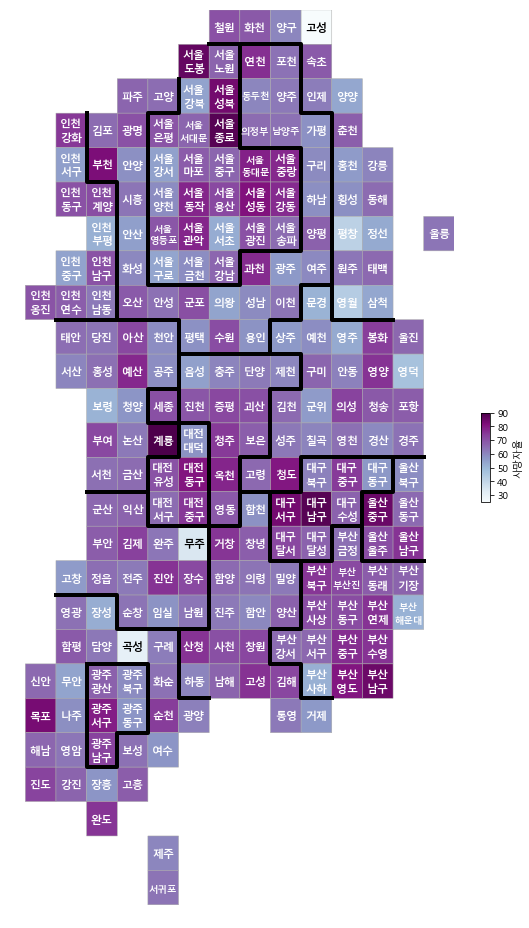

In [213]:
df = draw_korea.join(cityDF['사망자율'])
drawKorea('사망자율', df,'광역시도','행정구역','BuPu')
# cityDF의 사망자율 칼럼과 draw_korea 내부 조인을 하여 drawKorea 함수를 호출
# 충청남도 계룡시와 서울역이있는 서울종로구의 사망자율이 높은걸 확인할수 있음

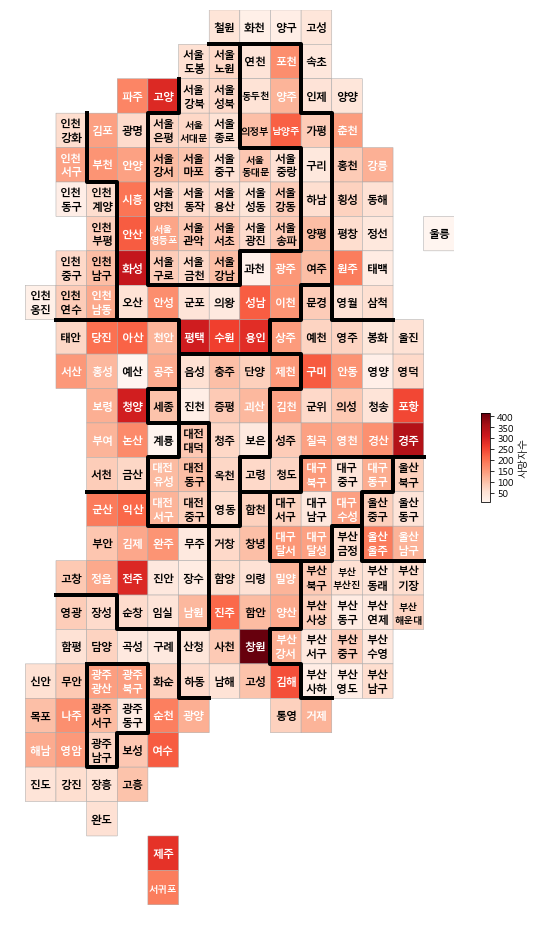

In [214]:
df = draw_korea.join(cityDF['사망자수'], how='inner')
drawKorea('사망자수', df,'광역시도','행정구역','Reds')
# 마찬가지로 사망자수를  확인하면 경상남도 창원시가 가장높음

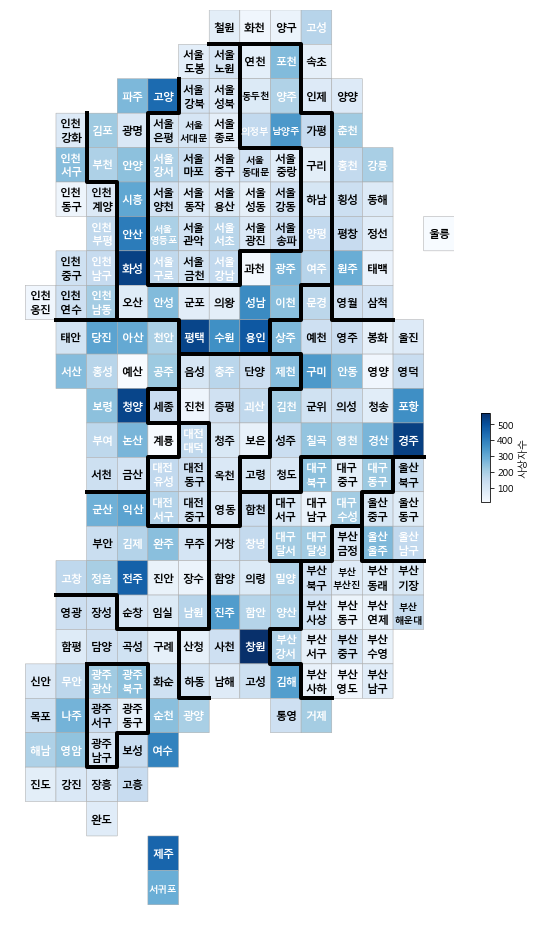

In [215]:
df = draw_korea.join(cityDF['사상자수'], how='inner')
drawKorea('사상자수', df,'광역시도','행정구역','Blues')
# 사상자수도 창원,경주,평택,화성시가 높은걸 확인할수있음
# 서울지역에 인구수가 많고 밀접했지만 사상자수와 사망자수도 적음
# 사망자율은 사상자수가 적어 비율이 높게나온것으로 분석됨

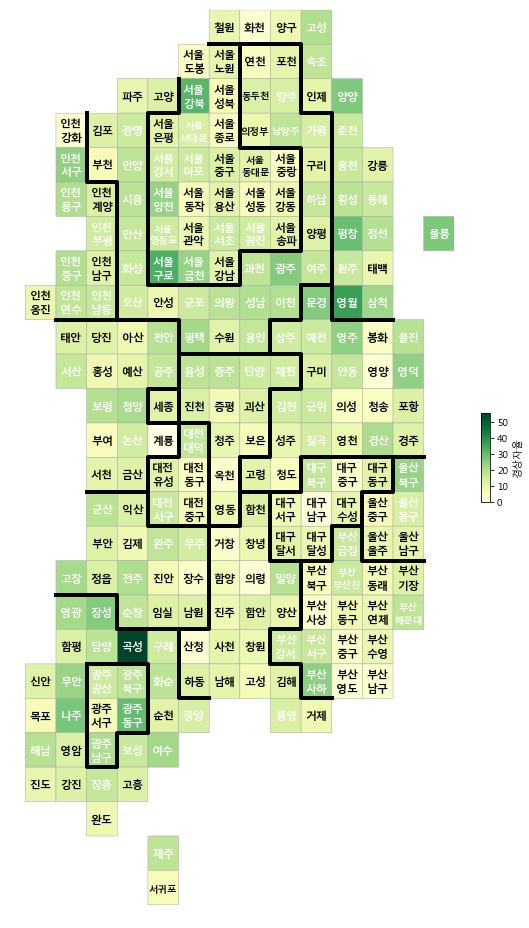

In [216]:
df = draw_korea.join(cityDF['경상자율'], how='inner')
drawKorea('경상자율', df,'광역시도','행정구역','YlGn')
# 경상자율은 곡성이 가장 높고 그다음으로 영월 서울구로 서울강북 순으로 확인

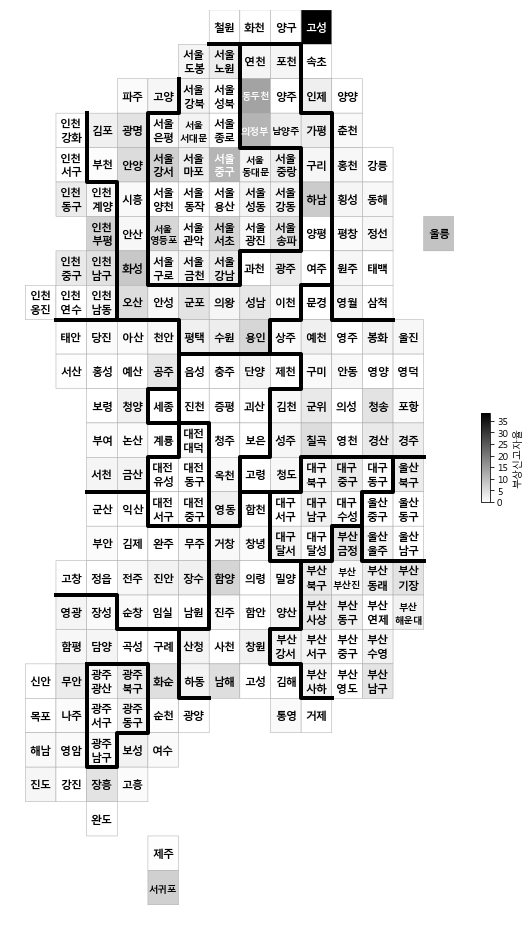

In [217]:
df = draw_korea.join(cityDF['부상신고자율'], how='inner')
drawKorea('부상신고자율', df,'광역시도','행정구역','binary')
# 부상신고자율은 고성이 압도적으로 가장높음

#### 끝으로                                                                                                        서울이 교통사고발생이 제일 높을줄 알았는데 경상남도 창원시에 사망자와 사상자수가 가장많다는 결과가 나왔다. 후에 분석을 더 하게된다면 경상남도 창원시를 중점으로 Folium 라이브러리를 활용하여 분석을 하고싶다.